In [63]:
from sklearn.datasets import make_friedman2,make_friedman1,make_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import *
from sklearn.ensemble import RandomForestRegressor
import lightgbm
from lightgbm import  LGBMRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
import pandas as pd

sns.set_style("darkgrid",{'axes.grid':False})

In [5]:
X,y=make_friedman1(n_samples=10000,n_features=7,noise=0.0,random_state=100)

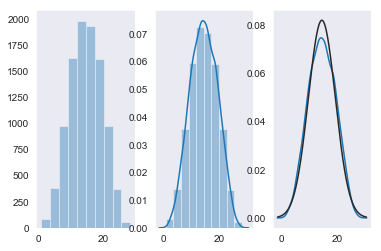

In [52]:
#distplot()集合了matplotlib的hist()和kdeplot()的功能
fig,axes=plt.subplots(1,3)
sns.distplot(y,bins=10,hist=True,kde=False,ax=axes[0])
sns.distplot(y,bins=10,hist=True,kde=True,ax=axes[1])
sns.distplot(y,bins=10,hist=False,kde=True,ax=axes[2],fit=norm)
#fit=norm表示拟合标准正态分布

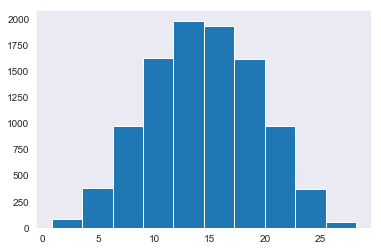

In [24]:
plt.hist(y)
plt.show()

In [26]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.20,random_state=100)

In [54]:
X_test,y_test=make_friedman1(n_samples=5000,n_features=7,noise=0.0,random_state=21)
#测试集误差密度分布图
def plot_residual_distribution(model):
    ax=sns.distplot(y_test-model.predict(X_test),hist=False,kde=True,kde_kws={'shade':True,'linewidth':3},axlabel='Residual')
    title=ax.set_title("Kernel density of residuals ",size=15)
#预测值和真实值的散点图分布
def plot_scatter_pred_actual(model):
    ax=sns.scatterplot(x=model.predict(X_test),y=y_test)
    ax.set_xlabel('Predictions')
    ax.set_ylabel('Actuals')
    title=ax.set_title("Actual vs Prediction scatter plpo",size=15)

In [ ]:
随机森林预测Random Forest

In [56]:
rf=RandomForestRegressor(n_estimators=50,oob_score=True,random_state=33)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=True, random_state=33, verbose=0, warm_start=False)

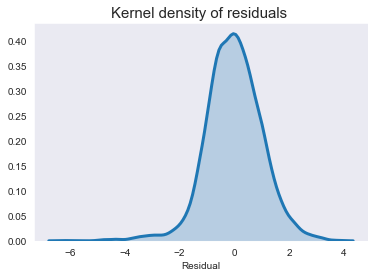

In [57]:
#测试集误差密度分布图
plot_residual_distribution(rf)

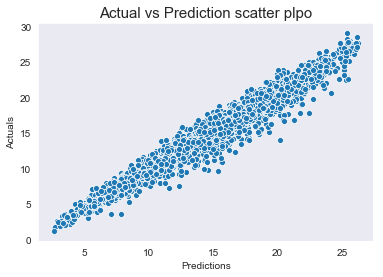

In [58]:
plot_scatter_pred_actual(rf)

In [61]:
gbm=LGBMRegressor(random_state=33)
gbm.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=33, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [62]:
gbm2=LGBMRegressor(objective='regression',
                   random_state=2021,
                   early_stopping_rounds=10,
                   n_estimators=10000
                   )
gbm2.fit(X_train,y_train,eval_set=[(X_valid,y_valid)],verbose=True)

C:\Users\29484\Anaconda3\lib\site-packages\lightgbm\engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l2: 21.1744
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's l2: 18.3731
[3]	valid_0's l2: 16.0275
[4]	valid_0's l2: 14.0334
[5]	valid_0's l2: 12.3372
[6]	valid_0's l2: 10.9097
[7]	valid_0's l2: 9.67552
[8]	valid_0's l2: 8.61641
[9]	valid_0's l2: 7.69145
[10]	valid_0's l2: 6.90207
[11]	valid_0's l2: 6.21512
[12]	valid_0's l2: 5.63019
[13]	valid_0's l2: 5.12836
[14]	valid_0's l2: 4.68157
[15]	valid_0's l2: 4.28407
[16]	valid_0's l2: 3.9011
[17]	valid_0's l2: 3.54214
[18]	valid_0's l2: 3.26544
[19]	valid_0's l2: 2.97695
[20]	valid_0's l2: 2.70897
[21]	valid_0's l2: 2.49754
[22]	valid_0's l2: 2.30636
[23]	valid_0's l2: 2.12311
[24]	valid_0's l2: 1.97197
[25]	valid_0's l2: 1.81172
[26]	valid_0's l2: 1.69315
[27]	valid_0's l2: 1.5766
[28]	valid_0's l2: 1.46485
[29]	valid_0's l2: 1.36808
[30]	valid_0's l2: 1.26497
[31]	valid_0's l2: 1.1963
[32]	valid_0's l2: 1.11963
[33]	valid_0's l2: 1.05737
[34]	valid_0's l2: 1.00154
[35]	valid_0's l2: 0.956399
[36]

[325]	valid_0's l2: 0.144959
[326]	valid_0's l2: 0.145001
[327]	valid_0's l2: 0.144962
[328]	valid_0's l2: 0.144814
[329]	valid_0's l2: 0.144893
[330]	valid_0's l2: 0.144848
[331]	valid_0's l2: 0.144881
[332]	valid_0's l2: 0.144786
[333]	valid_0's l2: 0.144716
[334]	valid_0's l2: 0.144502
[335]	valid_0's l2: 0.144472
[336]	valid_0's l2: 0.144402
[337]	valid_0's l2: 0.144386
[338]	valid_0's l2: 0.144377
[339]	valid_0's l2: 0.144362
[340]	valid_0's l2: 0.144302
[341]	valid_0's l2: 0.144091
[342]	valid_0's l2: 0.144157
[343]	valid_0's l2: 0.144119
[344]	valid_0's l2: 0.144116
[345]	valid_0's l2: 0.14407
[346]	valid_0's l2: 0.143887
[347]	valid_0's l2: 0.143779
[348]	valid_0's l2: 0.143732
[349]	valid_0's l2: 0.14372
[350]	valid_0's l2: 0.143651
[351]	valid_0's l2: 0.143443
[352]	valid_0's l2: 0.143387
[353]	valid_0's l2: 0.143273
[354]	valid_0's l2: 0.142819
[355]	valid_0's l2: 0.142674
[356]	valid_0's l2: 0.142516
[357]	valid_0's l2: 0.14246
[358]	valid_0's l2: 0.142473
[359]	valid_0's l

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       early_stopping_rounds=10, importance_type='split',
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=10000,
       n_jobs=-1, num_leaves=31, objective='regression', random_state=2021,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# objective参数
def custom_asymmetric_objective(label,y_pred):
    residual=(label-y_pred).astype('float')
    grad=np.where(residual<0,-2*10.0*residual,-2*residual)
    hess=np.where(residual<0,2*10.0,2.0)
    return grad,hess
#eval_metric 返回一个字符串，损失函数值以及关于更高更好的bool值
def custom_asymmetric_eval(label,y_pred):
    residual=(label-y_pred).astype('float')
    loss=np.where(residual<0,(residual**2)*10.0,residual**2)
    return "custom_asymmetric_eval",np.mean(loss),False


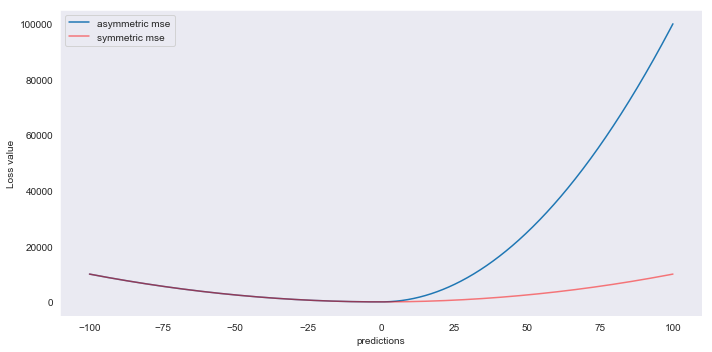

In [77]:
label=np.repeat(0,1000)
y_pred=np.linspace(-100,100,1000)
residual=(label-y_pred).astype("float")

custom_loss=np.where(residual<0,(residual**2)*10.0,residual**2)

fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.lineplot(y_pred,custom_loss,alpha=1,label="asymmetric mse")
sns.lineplot(y_pred,residual**2,alpha=0.5,label="symmetric mse",color="red")
ax.set_xlabel("predictions")
ax.set_ylabel("Loss value")
fig.tight_layout()



C:\Users\29484\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'g' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\29484\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\29484\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\29484\Anaconda3\lib\si

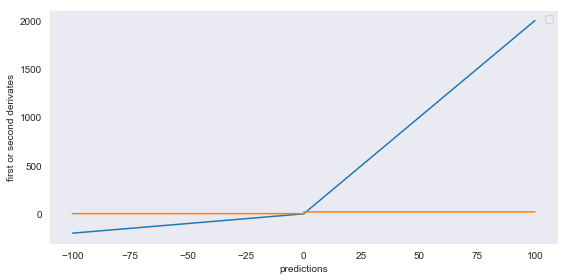

In [88]:
grad,hess=custom_asymmetric_objective(label,y_pred)

fig,ax=plt.subplots(1,1,figsize=(8,4))

ax.plot(y_pred,grad)
ax.plot(y_pred,hess)
ax.legend("gradient","hessian")
ax.set_xlabel("predictions")
ax.set_ylabel("first or second derivates")

fig.tight_layout()#调整子图

In [106]:
gbm3=LGBMRegressor(random_state=2022,silent=True,n_estimators=1000)
params={'objective':custom_asymmetric_objective}
gbm3.set_params(**params,metric='mae')
gbm3.fit(X_train,y_train,eval_set=[(X_valid,y_valid)],early_stopping_rounds=100,eval_metric=custom_asymmetric_eval,verbose=True)

[1]	valid_0's l1: 12.8882	valid_0's custom_asymmetric_eval: 187.261
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l1: 11.5924	valid_0's custom_asymmetric_eval: 152.74
[3]	valid_0's l1: 10.4282	valid_0's custom_asymmetric_eval: 124.69
[4]	valid_0's l1: 9.38191	valid_0's custom_asymmetric_eval: 102.002
[5]	valid_0's l1: 8.44349	valid_0's custom_asymmetric_eval: 83.5533
[6]	valid_0's l1: 7.60612	valid_0's custom_asymmetric_eval: 68.6384
[7]	valid_0's l1: 6.84382	valid_0's custom_asymmetric_eval: 56.3415
[8]	valid_0's l1: 6.16785	valid_0's custom_asymmetric_eval: 46.5188
[9]	valid_0's l1: 5.56055	valid_0's custom_asymmetric_eval: 38.4738
[10]	valid_0's l1: 5.02349	valid_0's custom_asymmetric_eval: 31.9704
[11]	valid_0's l1: 4.54005	valid_0's custom_asymmetric_eval: 26.6339
[12]	valid_0's l1: 4.10743	valid_0's custom_asymmetric_eval: 22.2788
[13]	valid_0's l1: 3.72634	valid_0's custom_asymmetric_eval: 18.7881
[14]	valid_0's l1: 3.38561	valid_0's custom_asymmet

[230]	valid_0's l1: 0.365486	valid_0's custom_asymmetric_eval: 0.658005
[231]	valid_0's l1: 0.36518	valid_0's custom_asymmetric_eval: 0.659225
[232]	valid_0's l1: 0.364466	valid_0's custom_asymmetric_eval: 0.658344
[233]	valid_0's l1: 0.36427	valid_0's custom_asymmetric_eval: 0.65833
[234]	valid_0's l1: 0.364123	valid_0's custom_asymmetric_eval: 0.659175
[235]	valid_0's l1: 0.363647	valid_0's custom_asymmetric_eval: 0.658972
[236]	valid_0's l1: 0.363548	valid_0's custom_asymmetric_eval: 0.659639
[237]	valid_0's l1: 0.363162	valid_0's custom_asymmetric_eval: 0.659577
[238]	valid_0's l1: 0.362885	valid_0's custom_asymmetric_eval: 0.659023
[239]	valid_0's l1: 0.362864	valid_0's custom_asymmetric_eval: 0.660515
[240]	valid_0's l1: 0.362738	valid_0's custom_asymmetric_eval: 0.661435
[241]	valid_0's l1: 0.362645	valid_0's custom_asymmetric_eval: 0.661511
[242]	valid_0's l1: 0.362569	valid_0's custom_asymmetric_eval: 0.661892
[243]	valid_0's l1: 0.362369	valid_0's custom_asymmetric_eval: 0.66

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       metric='mae', min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=1000, n_jobs=-1, num_leaves=31,
       objective=<function custom_asymmetric_objective at 0x000001482B18F1E0>,
       random_state=2022, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [92]:
gbm3.get_params

<bound method LGBMModel.get_params of LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       metrics=['mse', 'mae'], min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_leaves=31,
       objective=<function custom_asymmetric_objective at 0x000001482B18F1E0>,
       random_state=2022, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

In [93]:
gbm4=LGBMRegressor(random_state=33,
                   early_stopping_rounds=10,
                   n_estimators=1000,
                   objective="regression",
                   metrics=["mse","mae"])
gbm4.fit(X_train,y_train,eval_set=[(X_valid,y_valid)],eval_metric=custom_asymmetric_eval,
         verbose=True)



C:\Users\29484\Anaconda3\lib\site-packages\lightgbm\engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l2: 21.1744	valid_0's l1: 3.78522	valid_0's custom_asymmetric_eval: 119.547
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's l2: 18.3731	valid_0's l1: 3.5262	valid_0's custom_asymmetric_eval: 103.811
[3]	valid_0's l2: 16.0275	valid_0's l1: 3.29557	valid_0's custom_asymmetric_eval: 90.6139
[4]	valid_0's l2: 14.0334	valid_0's l1: 3.08578	valid_0's custom_asymmetric_eval: 79.3641
[5]	valid_0's l2: 12.3372	valid_0's l1: 2.89198	valid_0's custom_asymmetric_eval: 69.8559
[6]	valid_0's l2: 10.9097	valid_0's l1: 2.71803	valid_0's custom_asymmetric_eval: 61.9757
[7]	valid_0's l2: 9.67552	valid_0's l1: 2.55537	valid_0's custom_asymmetric_eval: 55.0707
[8]	valid_0's l2: 8.61641	valid_0's l1: 2.41082	valid_0's custom_asymmetric_eval: 49.0637
[9]	valid_0's l2: 7.69145	valid_0's l1: 2.27526	valid_0's custom_asymmetric_eval: 43.7919
[10]	valid_0's l2: 6.90207	valid_0's l1: 2.15137	valid_0's custom_asymmetric_eval: 39.4187
[11]	valid_0's l2: 6.21512	valid_0's l

[110]	valid_0's l2: 0.213224	valid_0's l1: 0.361774	valid_0's custom_asymmetric_eval: 1.16557
[111]	valid_0's l2: 0.21296	valid_0's l1: 0.361672	valid_0's custom_asymmetric_eval: 1.16482
[112]	valid_0's l2: 0.212085	valid_0's l1: 0.360849	valid_0's custom_asymmetric_eval: 1.16026
[113]	valid_0's l2: 0.211061	valid_0's l1: 0.359907	valid_0's custom_asymmetric_eval: 1.15431
[114]	valid_0's l2: 0.210111	valid_0's l1: 0.358848	valid_0's custom_asymmetric_eval: 1.14914
[115]	valid_0's l2: 0.209164	valid_0's l1: 0.35807	valid_0's custom_asymmetric_eval: 1.14521
[116]	valid_0's l2: 0.20626	valid_0's l1: 0.355476	valid_0's custom_asymmetric_eval: 1.12584
[117]	valid_0's l2: 0.205641	valid_0's l1: 0.354968	valid_0's custom_asymmetric_eval: 1.1229
[118]	valid_0's l2: 0.202917	valid_0's l1: 0.352715	valid_0's custom_asymmetric_eval: 1.10706
[119]	valid_0's l2: 0.201737	valid_0's l1: 0.35157	valid_0's custom_asymmetric_eval: 1.10024
[120]	valid_0's l2: 0.201586	valid_0's l1: 0.351513	valid_0's cus

[248]	valid_0's l2: 0.157502	valid_0's l1: 0.309933	valid_0's custom_asymmetric_eval: 0.856053
[249]	valid_0's l2: 0.157383	valid_0's l1: 0.309858	valid_0's custom_asymmetric_eval: 0.855823
[250]	valid_0's l2: 0.157333	valid_0's l1: 0.309861	valid_0's custom_asymmetric_eval: 0.854996
[251]	valid_0's l2: 0.157262	valid_0's l1: 0.309765	valid_0's custom_asymmetric_eval: 0.854791
[252]	valid_0's l2: 0.156877	valid_0's l1: 0.309296	valid_0's custom_asymmetric_eval: 0.852524
[253]	valid_0's l2: 0.156814	valid_0's l1: 0.309252	valid_0's custom_asymmetric_eval: 0.851806
[254]	valid_0's l2: 0.156583	valid_0's l1: 0.308995	valid_0's custom_asymmetric_eval: 0.850368
[255]	valid_0's l2: 0.156422	valid_0's l1: 0.308859	valid_0's custom_asymmetric_eval: 0.849718
[256]	valid_0's l2: 0.156318	valid_0's l1: 0.308745	valid_0's custom_asymmetric_eval: 0.849251
[257]	valid_0's l2: 0.1556	valid_0's l1: 0.307969	valid_0's custom_asymmetric_eval: 0.845396
[258]	valid_0's l2: 0.15552	valid_0's l1: 0.307867	v

[395]	valid_0's l2: 0.139507	valid_0's l1: 0.291002	valid_0's custom_asymmetric_eval: 0.76125
[396]	valid_0's l2: 0.139431	valid_0's l1: 0.290911	valid_0's custom_asymmetric_eval: 0.760991
[397]	valid_0's l2: 0.139409	valid_0's l1: 0.290875	valid_0's custom_asymmetric_eval: 0.76102
[398]	valid_0's l2: 0.139366	valid_0's l1: 0.290836	valid_0's custom_asymmetric_eval: 0.760885
[399]	valid_0's l2: 0.139375	valid_0's l1: 0.290865	valid_0's custom_asymmetric_eval: 0.761196
Early stopping, best iteration is:
[389]	valid_0's l2: 0.139591	valid_0's l1: 0.291181	valid_0's custom_asymmetric_eval: 0.760878


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       early_stopping_rounds=10, importance_type='split',
       learning_rate=0.1, max_depth=-1, metrics=['mse', 'mae'],
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=1000, n_jobs=-1, num_leaves=31, objective='regression',
       random_state=33, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [107]:
gbm5=LGBMRegressor(random_state=10,
                  early_stopping_rounds=10,
                  n_estimators=1000,
                  objective=custom_asymmetric_objective,
                  metric='mse')
gbm5.fit(X_train,y_train,eval_set=[(X_valid,y_valid)],eval_metric=custom_asymmetric_eval,verbose=True)


C:\Users\29484\Anaconda3\lib\site-packages\lightgbm\engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l2: 187.261	valid_0's custom_asymmetric_eval: 187.261
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's l2: 152.74	valid_0's custom_asymmetric_eval: 152.74
[3]	valid_0's l2: 124.69	valid_0's custom_asymmetric_eval: 124.69
[4]	valid_0's l2: 101.997	valid_0's custom_asymmetric_eval: 102.002
[5]	valid_0's l2: 83.5458	valid_0's custom_asymmetric_eval: 83.5533
[6]	valid_0's l2: 68.621	valid_0's custom_asymmetric_eval: 68.6384
[7]	valid_0's l2: 56.3141	valid_0's custom_asymmetric_eval: 56.3415
[8]	valid_0's l2: 46.4768	valid_0's custom_asymmetric_eval: 46.5188
[9]	valid_0's l2: 38.4182	valid_0's custom_asymmetric_eval: 38.4738
[10]	valid_0's l2: 31.8821	valid_0's custom_asymmetric_eval: 31.9704
[11]	valid_0's l2: 26.5095	valid_0's custom_asymmetric_eval: 26.6339
[12]	valid_0's l2: 22.115	valid_0's custom_asymmetric_eval: 22.2788
[13]	valid_0's l2: 18.5652	valid_0's custom_asymmetric_eval: 18.7881
[14]	valid_0's l2: 15.6094	valid_0's custom_asymmetric_e

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       early_stopping_rounds=10, importance_type='split',
       learning_rate=0.1, max_depth=-1, metric='mse', min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
       n_jobs=-1, num_leaves=31,
       objective=<function custom_asymmetric_objective at 0x000001482B18F1E0>,
       random_state=10, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [108]:
custom_asymmetric_eval(y_test,gbm5.predict(X_test))

('custom_asymmetric_eval', 0.643569364089063, False)

In [109]:
custom_asymmetric_eval(y_test,gbm4.predict(X_test))

('custom_asymmetric_eval', 0.8081581520081812, False)